# Mount google drive

In [3]:
from google.colab import drive
DRIVE_PATH = '/content/drive'
drive.mount(DRIVE_PATH)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Libraries Import


In [4]:
# !pip install pyclustering

In [5]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from matplotlib.cm import get_cmap
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MeanShift
from pyclustering.cluster.clarans import clarans as CLARANS

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


# Constant value definition


In [6]:
FILE_PATH = "/MyDrive/machine_learning/data/"
FILE_NAME = "housing.csv"
df = pd.read_csv(f"{DRIVE_PATH}/{FILE_PATH}/{FILE_NAME}")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [7]:
original_df = df
df = original_df.copy()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

# Preprocessing

In [10]:
# Drop null
df.dropna(axis=0, inplace=True)
df.reset_index(inplace=True,drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20433 entries, 0 to 20432
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
# Store median_house_value data
median_house_value = df['median_house_value']
df.drop(['median_house_value'], axis=1, inplace=True)

Text(0.5, 1.0, 'Correlation Heatmap')

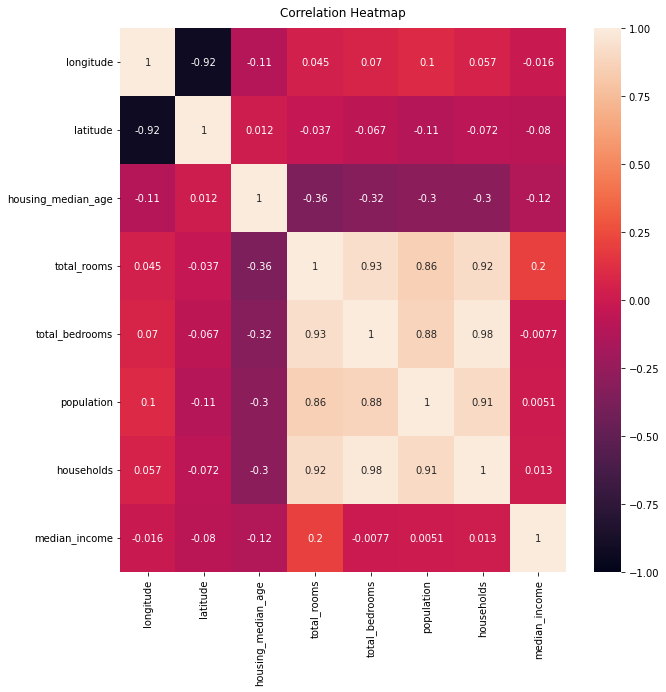

In [12]:
# Create dataset with attribute subset
# Correlation matrix for determining which attributes to use
plt.figure(figsize=(10,10))
corr_mat = sns.heatmap(df.drop('ocean_proximity', axis = 1).corr(), vmin=-1, vmax=1, annot=True)
corr_mat.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

# Creating subset data

In [13]:
# From the correlation matrix, attibutes housing_median_age, total_rooms, median_income are going to be used as subset
subset_df = df.copy()
subset_df.drop(['longitude','latitude','total_bedrooms','population','households'], axis=1, inplace=True)
subset_df

,housing_median_age,total_rooms,median_income,ocean_proximity
0,41.0,880.0,8.3252,NEAR BAY
1,21.0,7099.0,8.3014,NEAR BAY
2,52.0,1467.0,7.2574,NEAR BAY
3,52.0,1274.0,5.6431,NEAR BAY
4,52.0,1627.0,3.8462,NEAR BAY
...,...,...,...,...
20428,25.0,1665.0,1.5603,INLAND
20429,18.0,697.0,2.5568,INLAND
20430,17.0,2254.0,1.7000,INLAND
20431,18.0,1860.0,1.8672,INLAND


# Generating cluster

## function for visualizing result of clustering

In [14]:
def visualizingKMeans(X,encoder, scaler):
  data = X.copy()
  # Encode the dataset
  data['ocean_proximity'] = encoder.fit_transform(data.loc[:,['ocean_proximity']])
  columns = data.columns
  # Scale the dataset
  data = scaler.fit_transform(data)
  data = pd.DataFrame(data,columns = columns)
  
  # draws scatter plot for each k value, can see visualized result of cluster and can check silhouette score of clustering
  plt.figure(figsize=(12,12))
  for i in range(2,13):
    estimator = KMeans(n_clusters = i)
    ids = estimator.fit_predict(data)
    score = silhouette_score(data, ids)
    # silhouette_score function returns the mean Silhouette Coefficient over all samples, 
    # Silhouette coefficient is (b-a) / max(a,b)
    # where 
    # a = mean intra cluster distance
    # b = mean nearest-cluster distance

    print("silhouette score when k == %d : %f"%(i,score))
    plt.subplot(4,3,i-1)
    plt.tight_layout()
    plt.title("k values = {}".format(i))
    plt.xlabel('longitude')
    plt.ylabel('latitude')
    plt.scatter(data['longitude'],data['latitude'], c=ids,cmap = get_cmap('plasma'))
  plt.show()


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


silhouette score when k == 2 : 0.396779
silhouette score when k == 3 : 0.284000
silhouette score when k == 4 : 0.277561
silhouette score when k == 5 : 0.290950
silhouette score when k == 6 : 0.281126
silhouette score when k == 7 : 0.255721
silhouette score when k == 8 : 0.250155
silhouette score when k == 9 : 0.250373
silhouette score when k == 10 : 0.239481
silhouette score when k == 11 : 0.228315
silhouette score when k == 12 : 0.214283


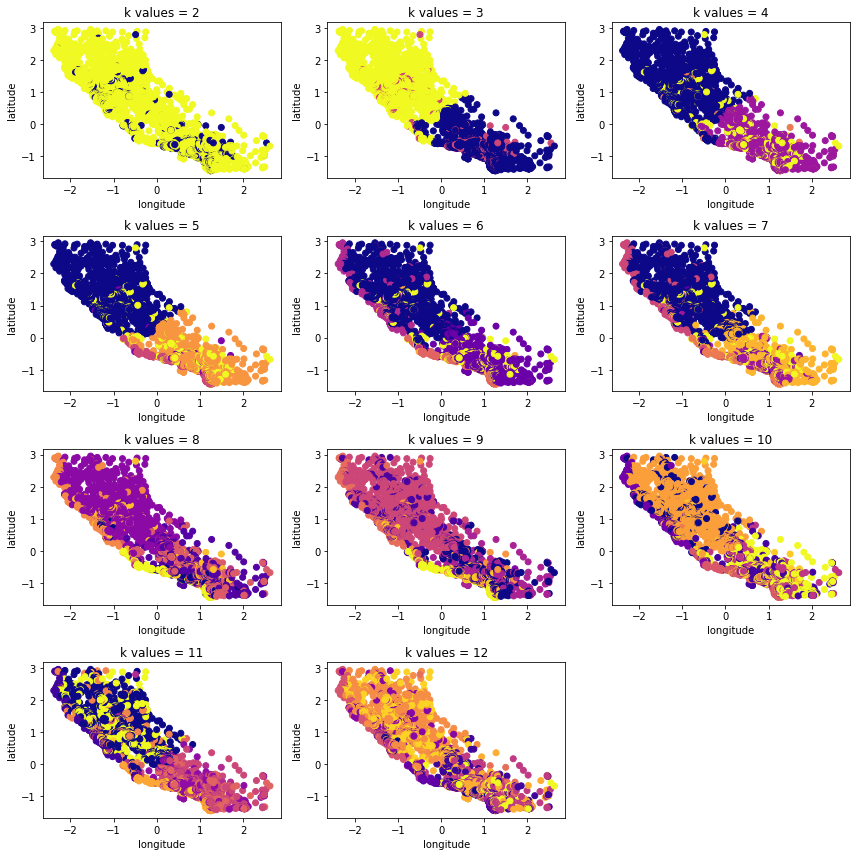

In [15]:
visualizingKMeans(df.copy(), LabelEncoder(), StandardScaler())

silhouette score when k == 2 : 0.432568
silhouette score when k == 3 : 0.377796
silhouette score when k == 4 : 0.409048
silhouette score when k == 5 : 0.370624
silhouette score when k == 6 : 0.348699
silhouette score when k == 7 : 0.339526
silhouette score when k == 8 : 0.322886
silhouette score when k == 9 : 0.281090
silhouette score when k == 10 : 0.279266
silhouette score when k == 11 : 0.268280
silhouette score when k == 12 : 0.274337


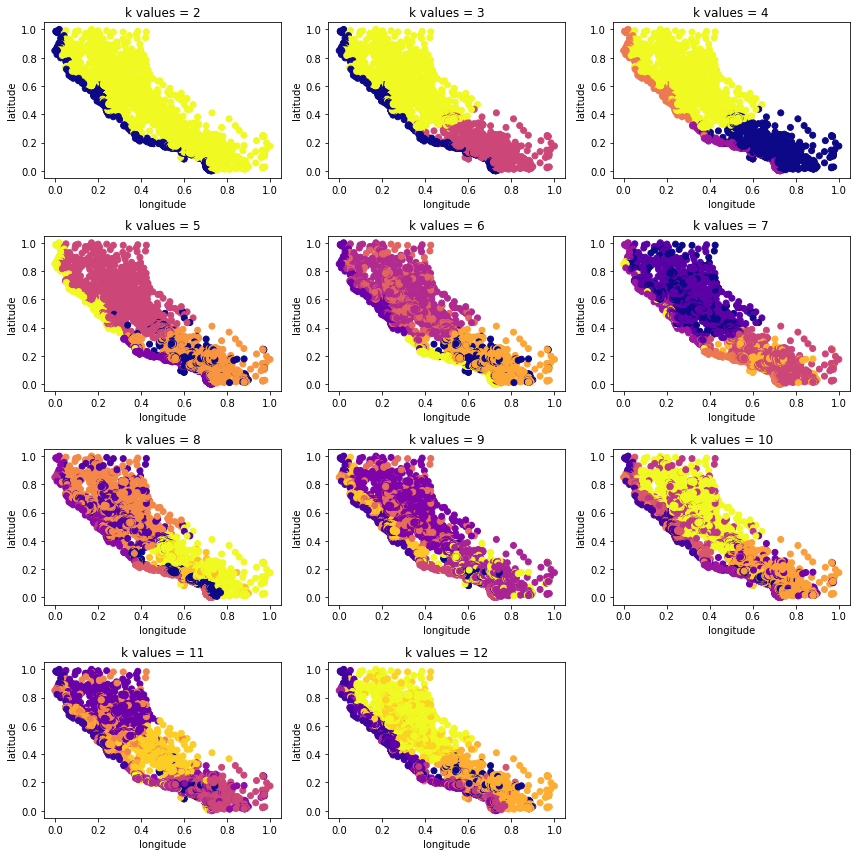

In [16]:
# kmeans with labelEncoder and standard scaler seems not good, trying another combination
visualizingKMeans(df.copy(), OrdinalEncoder(), MinMaxScaler())

silhouette score when k == 2 : 0.491601
silhouette score when k == 3 : 0.370903
silhouette score when k == 4 : 0.353720
silhouette score when k == 5 : 0.274030
silhouette score when k == 6 : 0.231875
silhouette score when k == 7 : 0.230223
silhouette score when k == 8 : 0.230983
silhouette score when k == 9 : 0.229402
silhouette score when k == 10 : 0.229869
silhouette score when k == 11 : 0.227941
silhouette score when k == 12 : 0.222540


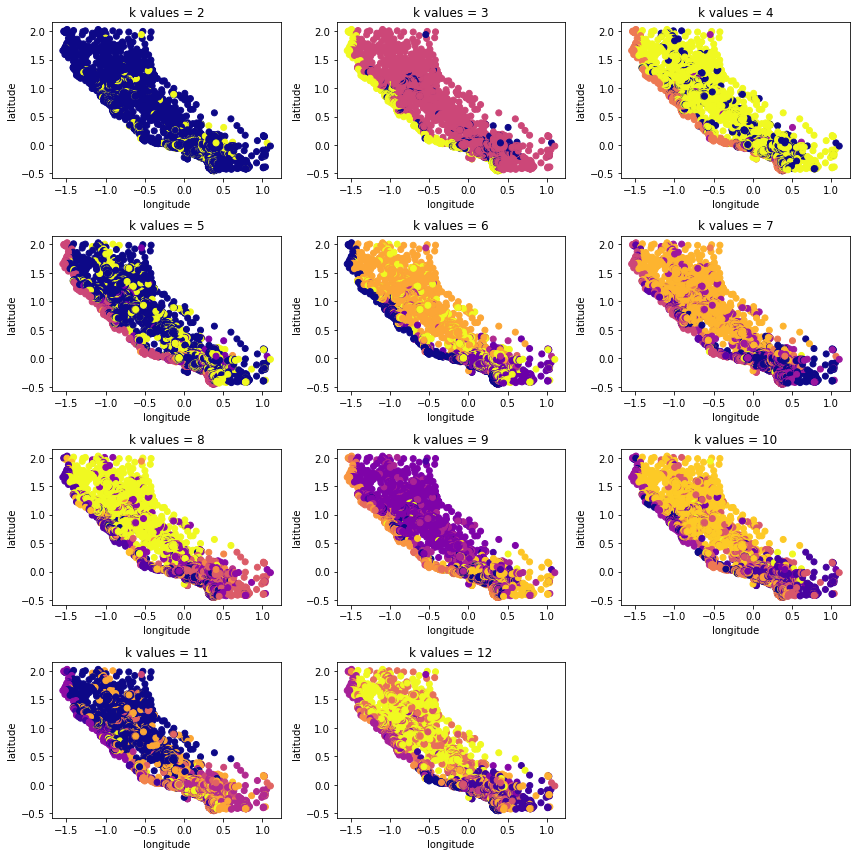

In [17]:
visualizingKMeans(df.copy(), OrdinalEncoder(), RobustScaler())

# for kmeans, ordinal encoder with minmax scaler showed best result from 'eyeballing'

# visualizing DBSCAN

In [18]:
def visualizingDBSCAN(X,encoder, scaler, model):
  data = X.copy()
  # Encode the dataset
  data['ocean_proximity'] = encoder.fit_transform(data.loc[:,['ocean_proximity']])
  columns = data.columns
  # Scale the dataset
  data = scaler.fit_transform(data)
  data = pd.DataFrame(data,columns = columns)
  
  # draws scatter plot for each k value, can see visualized result of cluster and can check silhouette score of clustering
  plt.figure(figsize=(12,12))
  for i in range(2,6):
    # estimator = DBSCAN(eps=i*0.1)
    model.eps = i*0.1;
    
    ids = model.fit_predict(data)
    score = silhouette_score(data, ids)
    # silhouette_score function returns the mean Silhouette Coefficient over all samples, 
    # Silhouette coefficient is (b-a) / max(a,b)
    # where 
    # a = mean intra cluster distance
    # b = mean nearest-cluster distance

    print("silhouette score when eps == %f : %f"%(i*0.1,score))
    plt.subplot(3,2,i-1)
    plt.tight_layout()
    plt.title("eps values = {}".format(i*0.1))
    plt.xlabel('longitude')
    plt.ylabel('latitude')
    plt.scatter(data['longitude'],data['latitude'], c=ids,cmap = get_cmap('plasma'))
  plt.show()


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


silhouette score when eps == 0.200000 : -0.609856
silhouette score when eps == 0.300000 : -0.512832
silhouette score when eps == 0.400000 : -0.468435
silhouette score when eps == 0.500000 : -0.428296


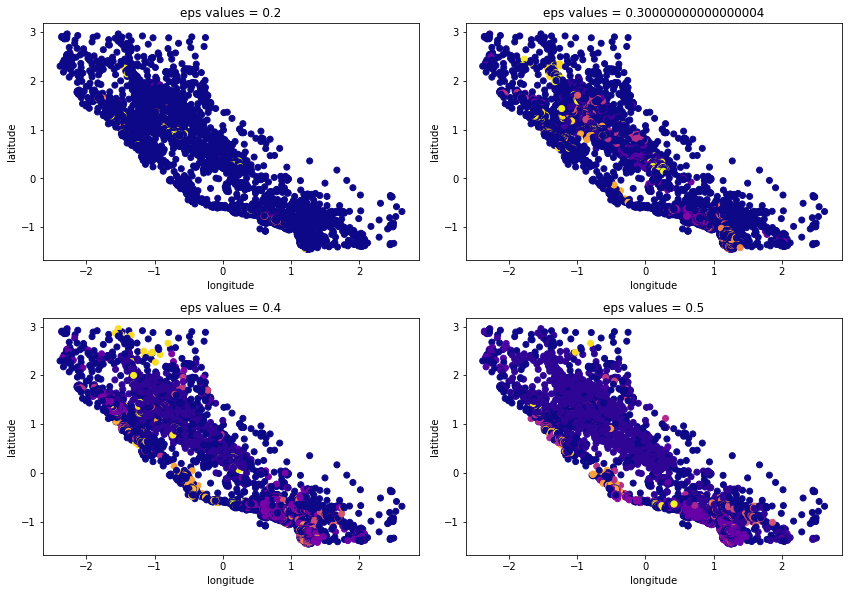

In [19]:
visualizingDBSCAN(df.copy(), LabelEncoder(), StandardScaler(),DBSCAN(metric='euclidean',min_samples=3))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


silhouette score when eps == 0.200000 : 0.202738
silhouette score when eps == 0.300000 : 0.611565
silhouette score when eps == 0.400000 : 0.654979
silhouette score when eps == 0.500000 : 0.654979


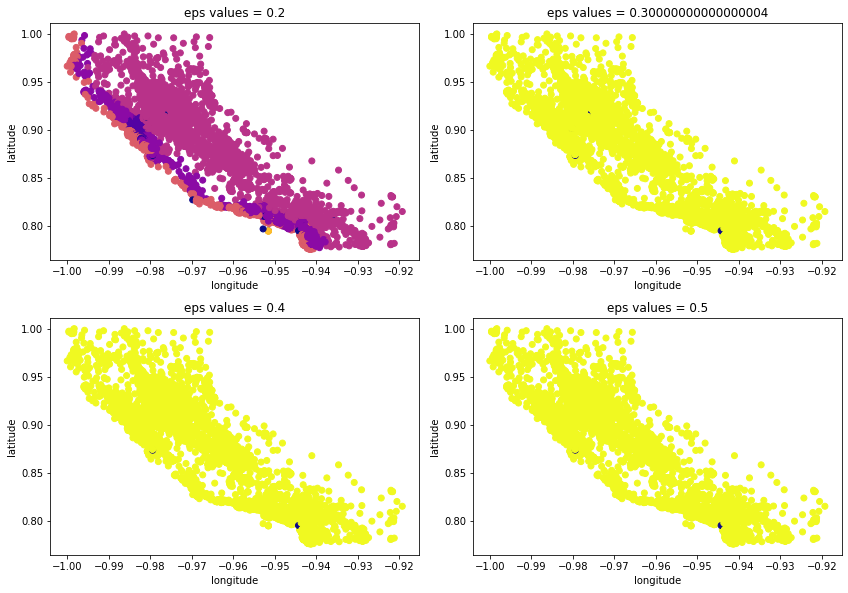

In [20]:
visualizingDBSCAN(df.copy(), LabelEncoder(), MaxAbsScaler(),DBSCAN(metric='euclidean',min_samples=3))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


silhouette score when eps == 0.200000 : 0.023137
silhouette score when eps == 0.300000 : 0.307753
silhouette score when eps == 0.400000 : 0.522750
silhouette score when eps == 0.500000 : 0.540041


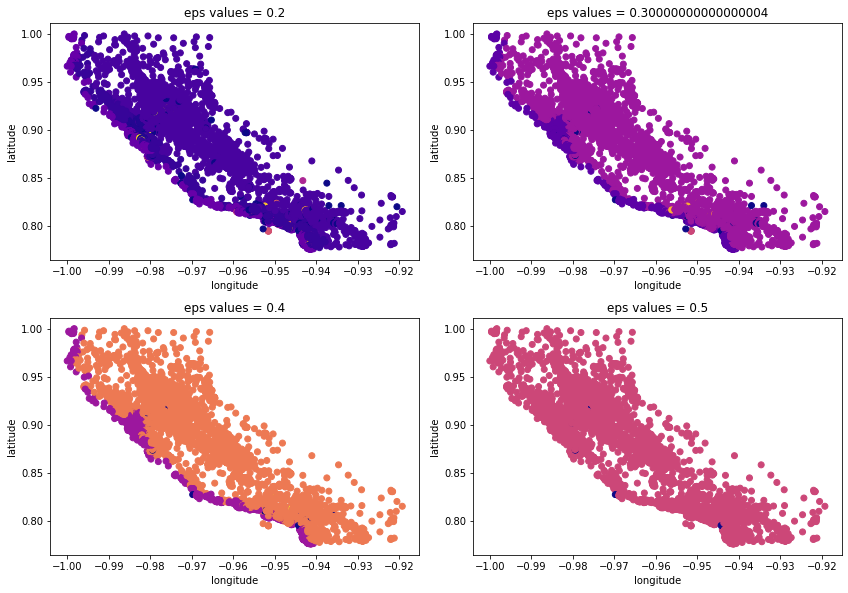

In [49]:
visualizingDBSCAN(df.copy(), LabelEncoder(), MaxAbsScaler(),DBSCAN(metric='manhattan',min_samples=3))

# Visualizing GMM

In [21]:
def visualizingGMM(X,encoder, scaler,model):
  data = X.copy()
  # Encode the dataset
  data['ocean_proximity'] = encoder.fit_transform(data.loc[:,['ocean_proximity']])
  columns = data.columns
  # Scale the dataset
  data = scaler.fit_transform(data)
  data = pd.DataFrame(data,columns = columns)
  
  # draws scatter plot for each k value, can see visualized result of cluster and can check silhouette score of clustering
  plt.figure(figsize=(12,12))
  for i in range(2,13):
    # estimator = GaussianMixture(n_components=i, max_iter=300)
    model.n_components = i
    ids = model.fit_predict(data)
    score = silhouette_score(data, ids)
    # silhouette_score function returns the mean Silhouette Coefficient over all samples, 
    # Silhouette coefficient is (b-a) / max(a,b)
    # where 
    # a = mean intra cluster distance
    # b = mean nearest-cluster distance

    print("silhouette score when k == %d : %f"%(i,score))
    plt.subplot(4,3,i-1)
    plt.tight_layout()
    plt.title("k values = {}".format(i))
    plt.xlabel('longitude')
    plt.ylabel('latitude')
    plt.scatter(data['longitude'],data['latitude'], c=ids,cmap = get_cmap('plasma'))
  plt.show()


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


silhouette score when k == 2 : 0.288032
silhouette score when k == 3 : 0.136558
silhouette score when k == 4 : 0.112795
silhouette score when k == 5 : 0.099453
silhouette score when k == 6 : 0.107542
silhouette score when k == 7 : 0.127626
silhouette score when k == 8 : 0.107497
silhouette score when k == 9 : 0.088675
silhouette score when k == 10 : 0.085778
silhouette score when k == 11 : 0.075276
silhouette score when k == 12 : 0.081200


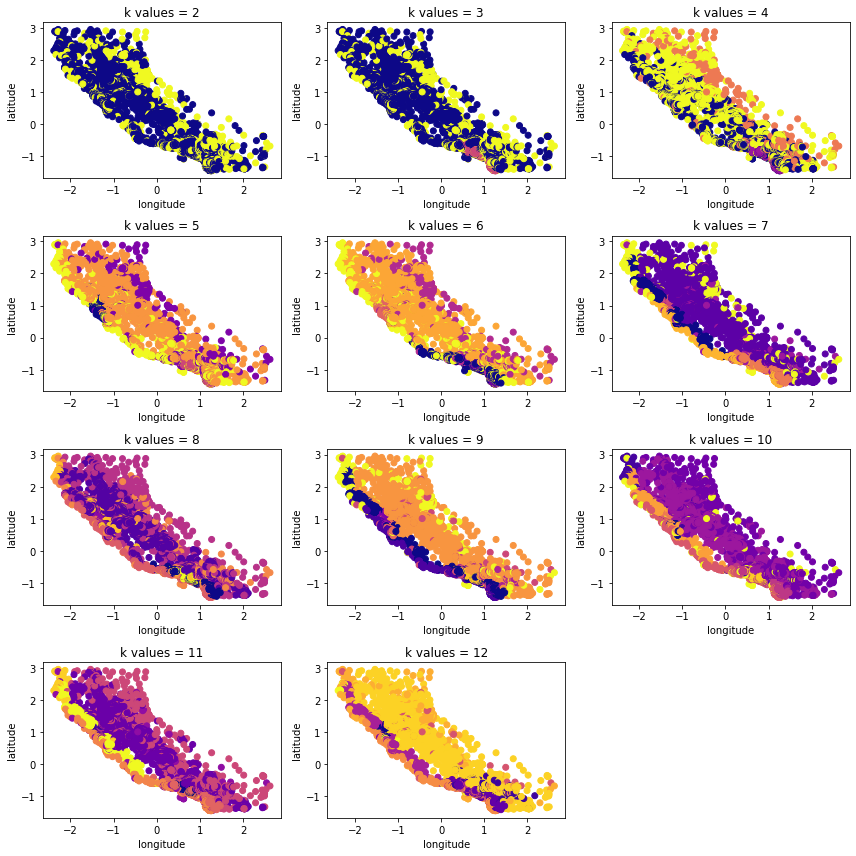

In [22]:
visualizingGMM(df.copy(), LabelEncoder(), StandardScaler(), GaussianMixture(max_iter=200))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


silhouette score when k == 2 : 0.239254
silhouette score when k == 3 : 0.290723
silhouette score when k == 4 : 0.315614
silhouette score when k == 5 : 0.284086
silhouette score when k == 6 : 0.243688
silhouette score when k == 7 : 0.203381
silhouette score when k == 8 : 0.234584
silhouette score when k == 9 : 0.143637
silhouette score when k == 10 : 0.153088
silhouette score when k == 11 : 0.164407
silhouette score when k == 12 : 0.135102


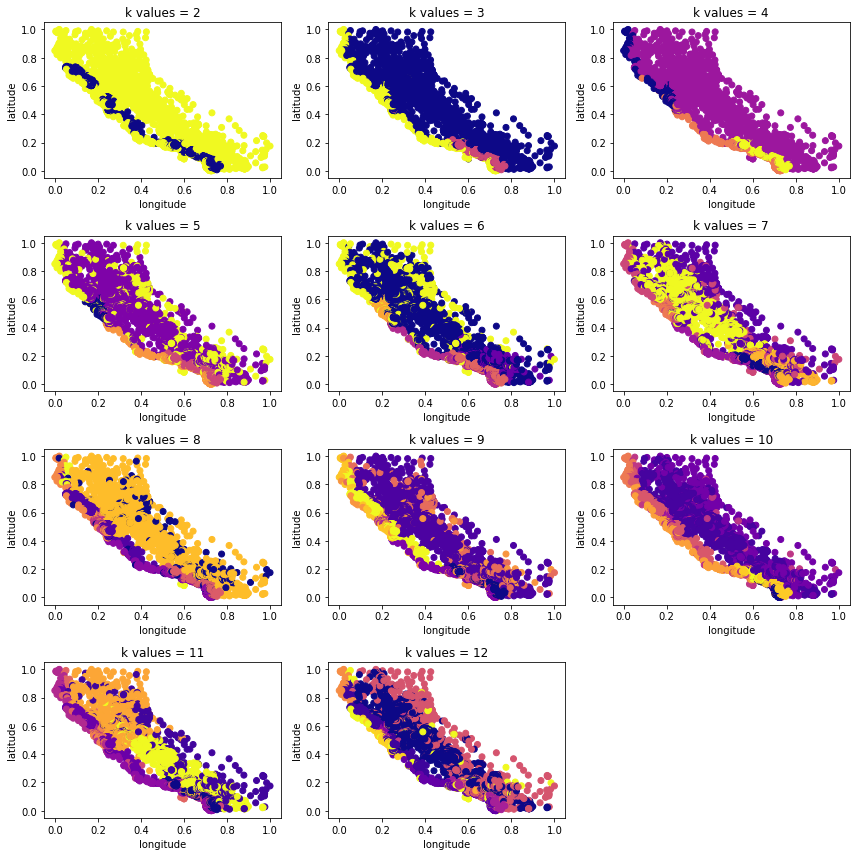

In [23]:
visualizingGMM(df.copy(), LabelEncoder(), MinMaxScaler(), GaussianMixture(max_iter=200))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


silhouette score when k == 2 : 0.535780
silhouette score when k == 3 : 0.286008
silhouette score when k == 4 : 0.226773
silhouette score when k == 5 : 0.174766
silhouette score when k == 6 : 0.217414
silhouette score when k == 7 : 0.140136
silhouette score when k == 8 : 0.132467
silhouette score when k == 9 : 0.138734
silhouette score when k == 10 : 0.124701
silhouette score when k == 11 : 0.060191
silhouette score when k == 12 : 0.089541


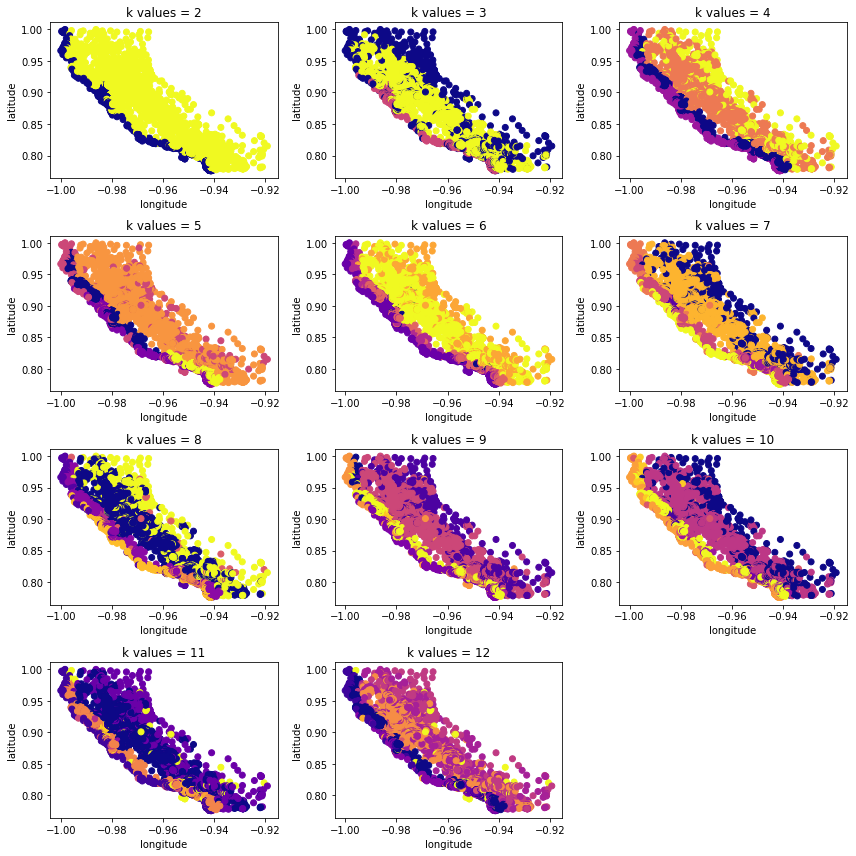

In [24]:
visualizingGMM(df.copy(), LabelEncoder(), MaxAbsScaler(), GaussianMixture(max_iter=200, covariance_type='full')) 

# visualizing Mean Shift

In [25]:
def visualizingMeanShift(X,encoder, scaler,model):
  data = X.copy()
  # Encode the dataset
  data['ocean_proximity'] = encoder.fit_transform(data.loc[:,['ocean_proximity']])
  columns = data.columns
  # Scale the dataset
  data = scaler.fit_transform(data)
  data = pd.DataFrame(data,columns = columns)
  
  # draws scatter plot for each k value, can see visualized result of cluster and can check silhouette score of clustering
  plt.figure(figsize=(12,12))
  for i in range(2,5):
    model.min_bin_freq = i-1
    ids = model.fit_predict(data)
    score = silhouette_score(data, ids)
    # silhouette_score function returns the mean Silhouette Coefficient over all samples, 
    # Silhouette coefficient is (b-a) / max(a,b)
    # where 
    # a = mean intra cluster distance
    # b = mean nearest-cluster distance

    print("silhouette score when min_bin_freq == %d : %f"%(i-1,score))
    plt.subplot(2,3,i-1)
    plt.tight_layout()
    plt.title("k values = {}".format(i-1))
    plt.xlabel('longitude')
    plt.ylabel('latitude')
    plt.scatter(data['longitude'],data['latitude'], c=ids,cmap = get_cmap('plasma'))
  plt.show()


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


silhouette score when min_bin_freq == 1 : 0.461919
silhouette score when min_bin_freq == 2 : 0.698656
silhouette score when min_bin_freq == 3 : 0.700979


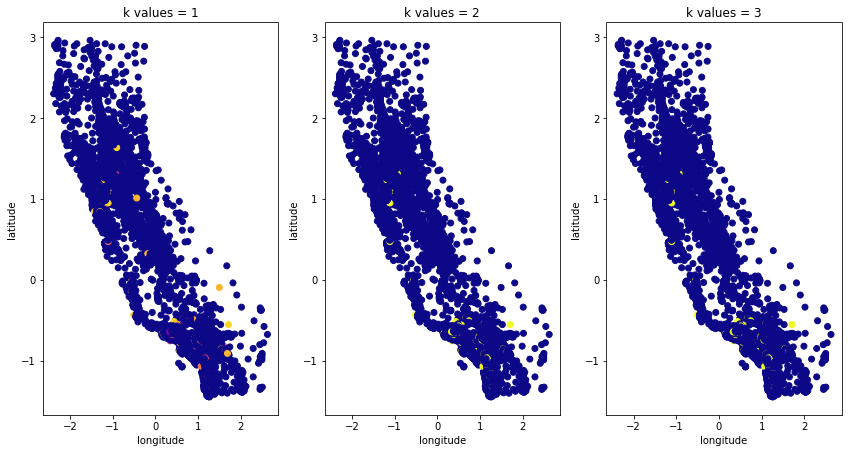

In [27]:
visualizingMeanShift(df.copy(),LabelEncoder(),StandardScaler(), MeanShift(bin_seeding=True,max_iter=400))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


silhouette score when min_bin_freq == 1 : 0.526946
silhouette score when min_bin_freq == 2 : 0.535931
silhouette score when min_bin_freq == 3 : 0.535931


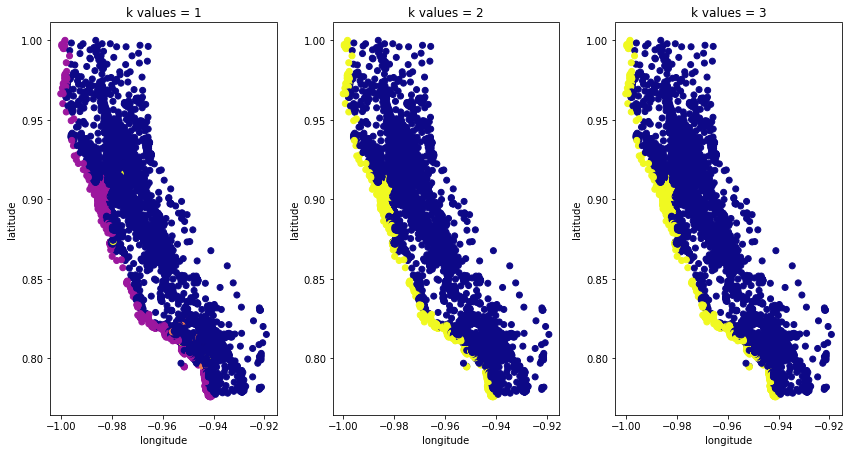

In [29]:
visualizingMeanShift(df.copy(),LabelEncoder(),MaxAbsScaler(), MeanShift(bin_seeding=True,max_iter=400))

# visualizing clarans

In [30]:
# Change CLARANS result to ScikitLearn result
def clarans_label_converter(labels):
  total_len = 0
  for k in range(0, len(labels)):
    total_len += len(labels[k])

  outList = np.empty((total_len), dtype=int)
  cluster_number = 0
  for k in range(0, len(labels)):
    for l in range(0, len(labels[k])):
      outList[labels[k][l]] = cluster_number
    cluster_number += 1
  return outList

In [31]:
def findCLARANS(X,cluster_k_value,cur_scaler):
  global best_score,best_k_,best_scaler,best_model,best_score,labels_
  labels = None
  model=CLARANS(data=X.tolist(),number_clusters=cluster_k_value, numlocal=2, maxneighbor=3)
  model.process()
  clarans_label = model.get_clusters()
  labels = clarans_label_converter(labels=clarans_label)
  score_result = silhouette_score(X, labels)
  # if mean value of scores are bigger than max variable,
  # update new options(model, scaler, k) to best options
  if best_score < score_result:
    best_score = score_result
    best_scaler = cur_scaler
    best_model = CLARANS(data=X.tolist(),number_clusters=cluster_k_value, numlocal=2, maxneighbor=3)
    best_k_ = cluster_k_value
    labels_ = copy.deepcopy(labels)

In [36]:
def visualizingClarans(X,encoder, scaler):
  data = X.copy()
  # Encode the dataset
  data['ocean_proximity'] = encoder.fit_transform(data.loc[:,['ocean_proximity']])
  columns = data.columns
  # Scale the dataset
  data = scaler.fit_transform(data)
  # data = pd.DataFrame(data,columns = columns)
  
  # draws scatter plot for each k value, can see visualized result of cluster and can check silhouette score of clustering
  plt.figure(figsize=(12,12))
  for i in range(2,13):
    # estimator = GaussianMixture(n_components=i, max_iter=300)
    model = CLARANS(data = data.tolist(), numlocal = 2,maxneighbor = 3, number_clusters=i)
    model.process()
    
    ids = clarans_label_converter(data, ids)
    score = silhouette_score(data, ids)
    # silhouette_score function returns the mean Silhouette Coefficient over all samples, 
    # Silhouette coefficient is (b-a) / max(a,b)
    # where 
    # a = mean intra cluster distance
    # b = mean nearest-cluster distance

    print("silhouette score when k == %d : %f"%(i,score))
    plt.subplot(4,3,i-1)
    plt.tight_layout()
    plt.title("k values = {}".format(i))
    plt.xlabel('longitude')
    plt.ylabel('latitude')
    plt.scatter(data['longitude'],data['latitude'], c=ids,cmap = get_cmap('plasma'))
  plt.show()


In [37]:
visualizingClarans(df.copy(), LabelEncoder(), MaxAbsScaler())

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: ignored

<Figure size 864x864 with 0 Axes>

# Implementation of AutoML function

## Preprocessing function

In [82]:
def do_scaling(scalers, dfs):
  scaled_df = {} # output value
    
  for scaler in scalers: # do scaling for all scalers
    encoders = {}
    for encoder in dfs.keys():
      temp_df = dfs[encoder].copy()
      temp_df = scaler.fit_transform(temp_df)
      encoders[encoder] = temp_df
    scaled_df[scaler] = encoders
  
  return scaled_df 
  # returns dictonary, which has sclaer as key, and has value of dictonary which has encoder as a key and encoded, scaled 
  # dataframe as value

In [83]:
def do_encoding(encoders, df):
  encoded_df = {}

  for encoder in encoders:
    temp_df = df.copy()
    # encodes ocean_proximity attribute
    temp_df['ocean_proximity'] = encoder.fit_transform(temp_df.loc[:,['ocean_proximity']])
    encoded_df[encoder] = temp_df
  
  return encoded_df # returns dictonary, which has encoder as key value and encoded dataframe as value


## Modeling function

In [96]:
def AutoML(scalers, encoders, models, df):
  encoded_df = do_encoding(encoders,df)
  scaled_df = do_scaling(scalers, encoded_df)
  default_models = []
  default_models.append(KMeans(n_clusters=2,max_iter=300))
  default_models.append(DBSCAN(eps=0.4, metric='euclidean',min_samples=3))
  default_models.append(GaussianMixture(n_components=2, max_iter=200, covariance_type='full'))
  default_models.append(MeanShift(bin_seeding=True, max_iter=400, min_bin_freq=3))
  train_models = []
  for model in models:
    temp_check = True
    for stan in default_models:
      if (type(model) ==type(stan)):
        temp_check = False
        train_models.append(stan)
        break
    if (temp_check):
      print("Invalid model is given, please try again with different model set")
      return 0
  result_list = []
  for scaled in scaled_df.keys():
    encoders = scaled_df[scaled]
    for encoded in encoders.keys():
      dataset = encoders[encoded]
      print(encoded)
      for model in train_models:
        data = dataset.copy()
        ids = model.fit_predict(data)
        score = silhouette_score(data, ids)
        temp_list = [score,model,scaled,encoded]
        print(temp_list)
        result_list.append(temp_list)

  return result_list
  


  
  


  

In [92]:
encoders = [LabelEncoder(),OrdinalEncoder()]
scalers = [StandardScaler(), MinMaxScaler(), RobustScaler(),MaxAbsScaler()]
models = [KMeans(),DBSCAN(),GaussianMixture(),MeanShift()]
result = AutoML(scalers,encoders,models,df)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()
[0.39677877584298743, KMeans(n_clusters=2), StandardScaler(), LabelEncoder()]
[-0.5128320893087447, DBSCAN(eps=0.3, min_samples=3), StandardScaler(), LabelEncoder()]
[0.28800646379161027, GaussianMixture(max_iter=200, n_components=2), StandardScaler(), LabelEncoder()]
[0.7009792632357618, MeanShift(bin_seeding=True, max_iter=400, min_bin_freq=3), StandardScaler(), LabelEncoder()]
OrdinalEncoder()
[0.3929514350917493, KMeans(n_clusters=2), StandardScaler(), OrdinalEncoder()]
[-0.5128320893087447, DBSCAN(eps=0.3, min_samples=3), StandardScaler(), OrdinalEncoder()]
[0.2745911643163918, GaussianMixture(max_iter=200, n_components=2), StandardScaler(), OrdinalEncoder()]
[0.7009792632357618, MeanShift(bin_seeding=True, max_iter=400, min_bin_freq=3), StandardScaler(), OrdinalEncoder()]
LabelEncoder()
[0.43256809655514894, KMeans(n_clusters=2), MinMaxScaler(), LabelEncoder()]
[0.43155971795305625, DBSCAN(eps=0.3, min_samples=3), MinMaxScaler(), LabelEncoder()]
[0.4324192895108473

In [93]:
result.sort(key = lambda i:i[0], reverse=True)
result[:5]

[[0.7429803957917859,
  MeanShift(bin_seeding=True, max_iter=400, min_bin_freq=3),
  RobustScaler(),
  LabelEncoder()],
 [0.7429803957917859,
  MeanShift(bin_seeding=True, max_iter=400, min_bin_freq=3),
  RobustScaler(),
  OrdinalEncoder()],
 [0.7009792632357618,
  MeanShift(bin_seeding=True, max_iter=400, min_bin_freq=3),
  StandardScaler(),
  LabelEncoder()],
 [0.7009792632357618,
  MeanShift(bin_seeding=True, max_iter=400, min_bin_freq=3),
  StandardScaler(),
  OrdinalEncoder()],
 [0.6115648099401374,
  DBSCAN(eps=0.3, min_samples=3),
  MaxAbsScaler(),
  LabelEncoder()]]

In [97]:
subset_result = AutoML(scalers,encoders,[KMeans(),GaussianMixture(),MeanShift()], subset_df)
subset_result.sort(key = lambda i:i[0], reverse = True)
subset_result[:5]

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()
[0.3356302078393087, KMeans(n_clusters=2), StandardScaler(), LabelEncoder()]
[0.3356302078393087, GaussianMixture(max_iter=200, n_components=2), StandardScaler(), LabelEncoder()]
[0.6936690504584367, MeanShift(bin_seeding=True, max_iter=400, min_bin_freq=3), StandardScaler(), LabelEncoder()]
OrdinalEncoder()
[0.3356302078393087, KMeans(n_clusters=2), StandardScaler(), OrdinalEncoder()]
[0.3280845656736405, GaussianMixture(max_iter=200, n_components=2), StandardScaler(), OrdinalEncoder()]
[0.6936690504584367, MeanShift(bin_seeding=True, max_iter=400, min_bin_freq=3), StandardScaler(), OrdinalEncoder()]
LabelEncoder()
[0.5549992670633461, KMeans(n_clusters=2), MinMaxScaler(), LabelEncoder()]
[0.5550299732705886, GaussianMixture(max_iter=200, n_components=2), MinMaxScaler(), LabelEncoder()]
[0.5550299732705886, MeanShift(bin_seeding=True, max_iter=400, min_bin_freq=3), MinMaxScaler(), LabelEncoder()]
OrdinalEncoder()
[0.5549992670633461, KMeans(n_clusters=2), MinMaxScaler()

[[0.6936690504584367,
  MeanShift(bin_seeding=True, max_iter=400, min_bin_freq=3),
  StandardScaler(),
  LabelEncoder()],
 [0.6936690504584367,
  MeanShift(bin_seeding=True, max_iter=400, min_bin_freq=3),
  StandardScaler(),
  OrdinalEncoder()],
 [0.5605582349380278,
  GaussianMixture(max_iter=200, n_components=2),
  MaxAbsScaler(),
  LabelEncoder()],
 [0.5605582349380278,
  MeanShift(bin_seeding=True, max_iter=400, min_bin_freq=3),
  MaxAbsScaler(),
  LabelEncoder()],
 [0.5605582349380278,
  GaussianMixture(max_iter=200, n_components=2),
  MaxAbsScaler(),
  OrdinalEncoder()]]